# Loading Libraries


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report

from xgboost import XGBClassifier



#Loading data

In [ ]:
df = pd.read_excel("e_commerce_data.xlsx",
                   sheet_name = 'E Comm')

df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


# Data exploration and visualization

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

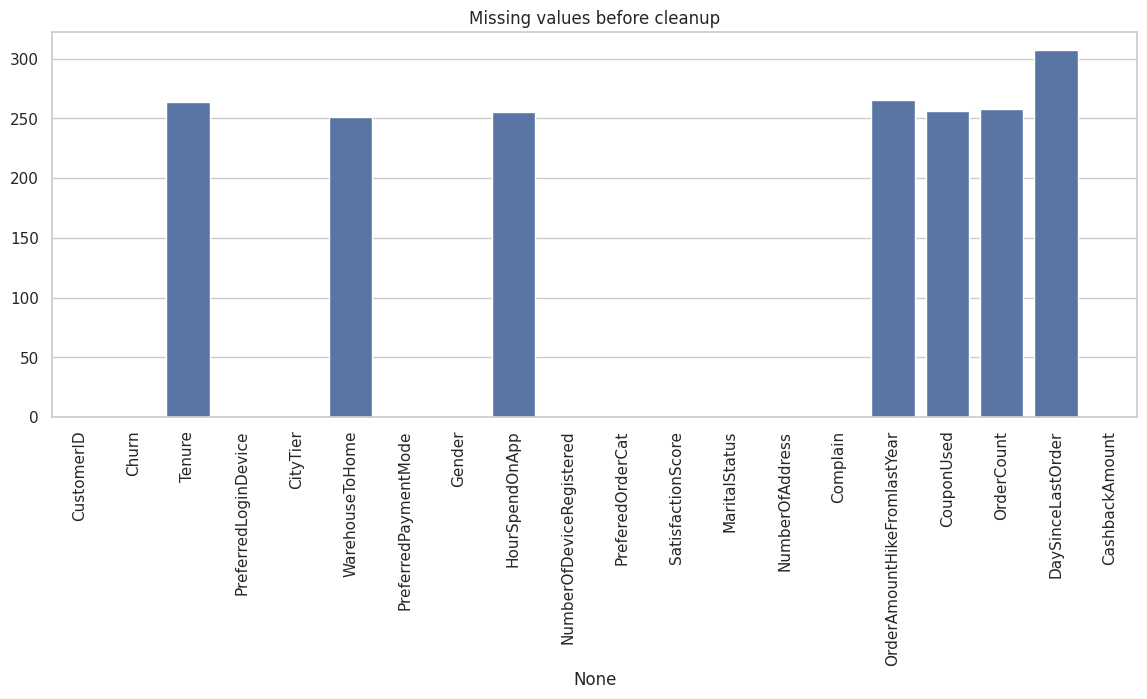

In [ ]:
# Create a figure for the chart
plt.figure(figsize=(14, 5))

# Barplot to show the number of missing values ​​in each column before cleaning
missing_values_before = df.isnull().sum()
sns.barplot(x=missing_values_before.index, y=missing_values_before.values)

plt.title('Missing values ​​before cleanup')
plt.xticks(rotation=90)

# Show chart
plt.show()

## Removing missing values

In [ ]:
df.dropna(inplace = True, axis = 0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3774 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   3774 non-null   int64  
 1   Churn                        3774 non-null   int64  
 2   Tenure                       3774 non-null   float64
 3   PreferredLoginDevice         3774 non-null   object 
 4   CityTier                     3774 non-null   int64  
 5   WarehouseToHome              3774 non-null   float64
 6   PreferredPaymentMode         3774 non-null   object 
 7   Gender                       3774 non-null   object 
 8   HourSpendOnApp               3774 non-null   float64
 9   NumberOfDeviceRegistered     3774 non-null   int64  
 10  PreferedOrderCat             3774 non-null   object 
 11  SatisfactionScore            3774 non-null   int64  
 12  MaritalStatus                3774 non-null   object 
 13  NumberOfAddress        

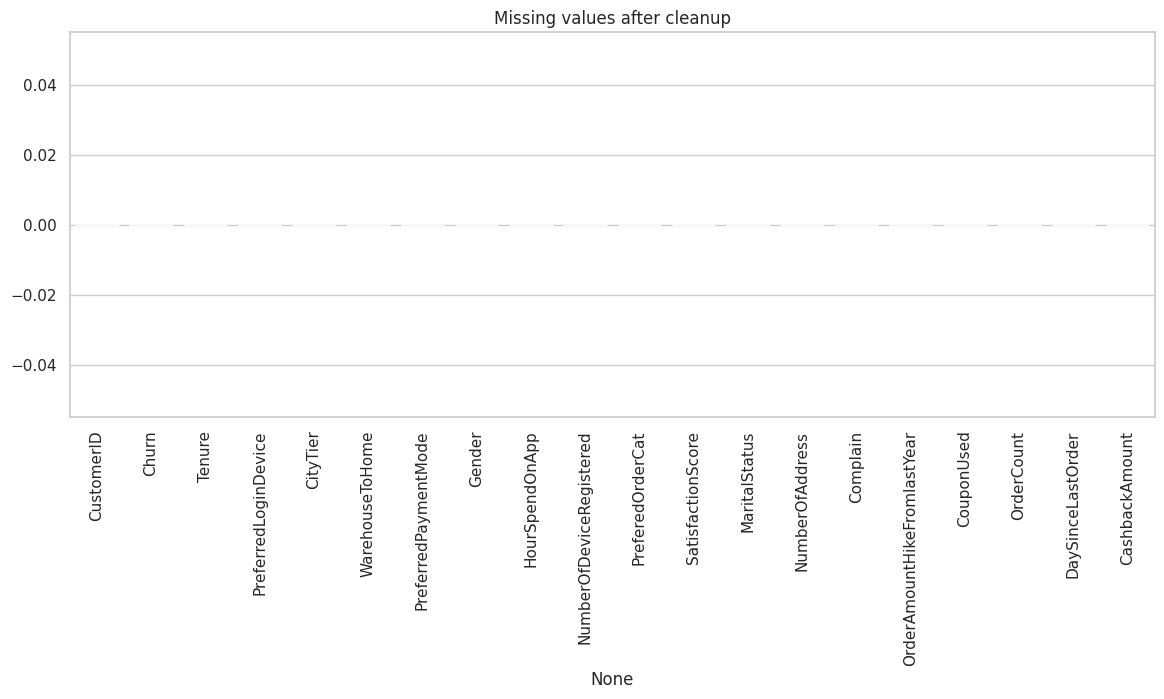

In [ ]:
# Create a figure for the chart
plt.figure(figsize=(14, 5))

# Barplot to show the number of missing values ​​in each column after cleaning
missing_values_after = df.isnull().sum()
sns.barplot(x=missing_values_after.index, y=missing_values_after.values)

plt.title('Missing values after cleanup')
plt.xticks(rotation=90)

# Show chart
plt.show()

## Data visualization


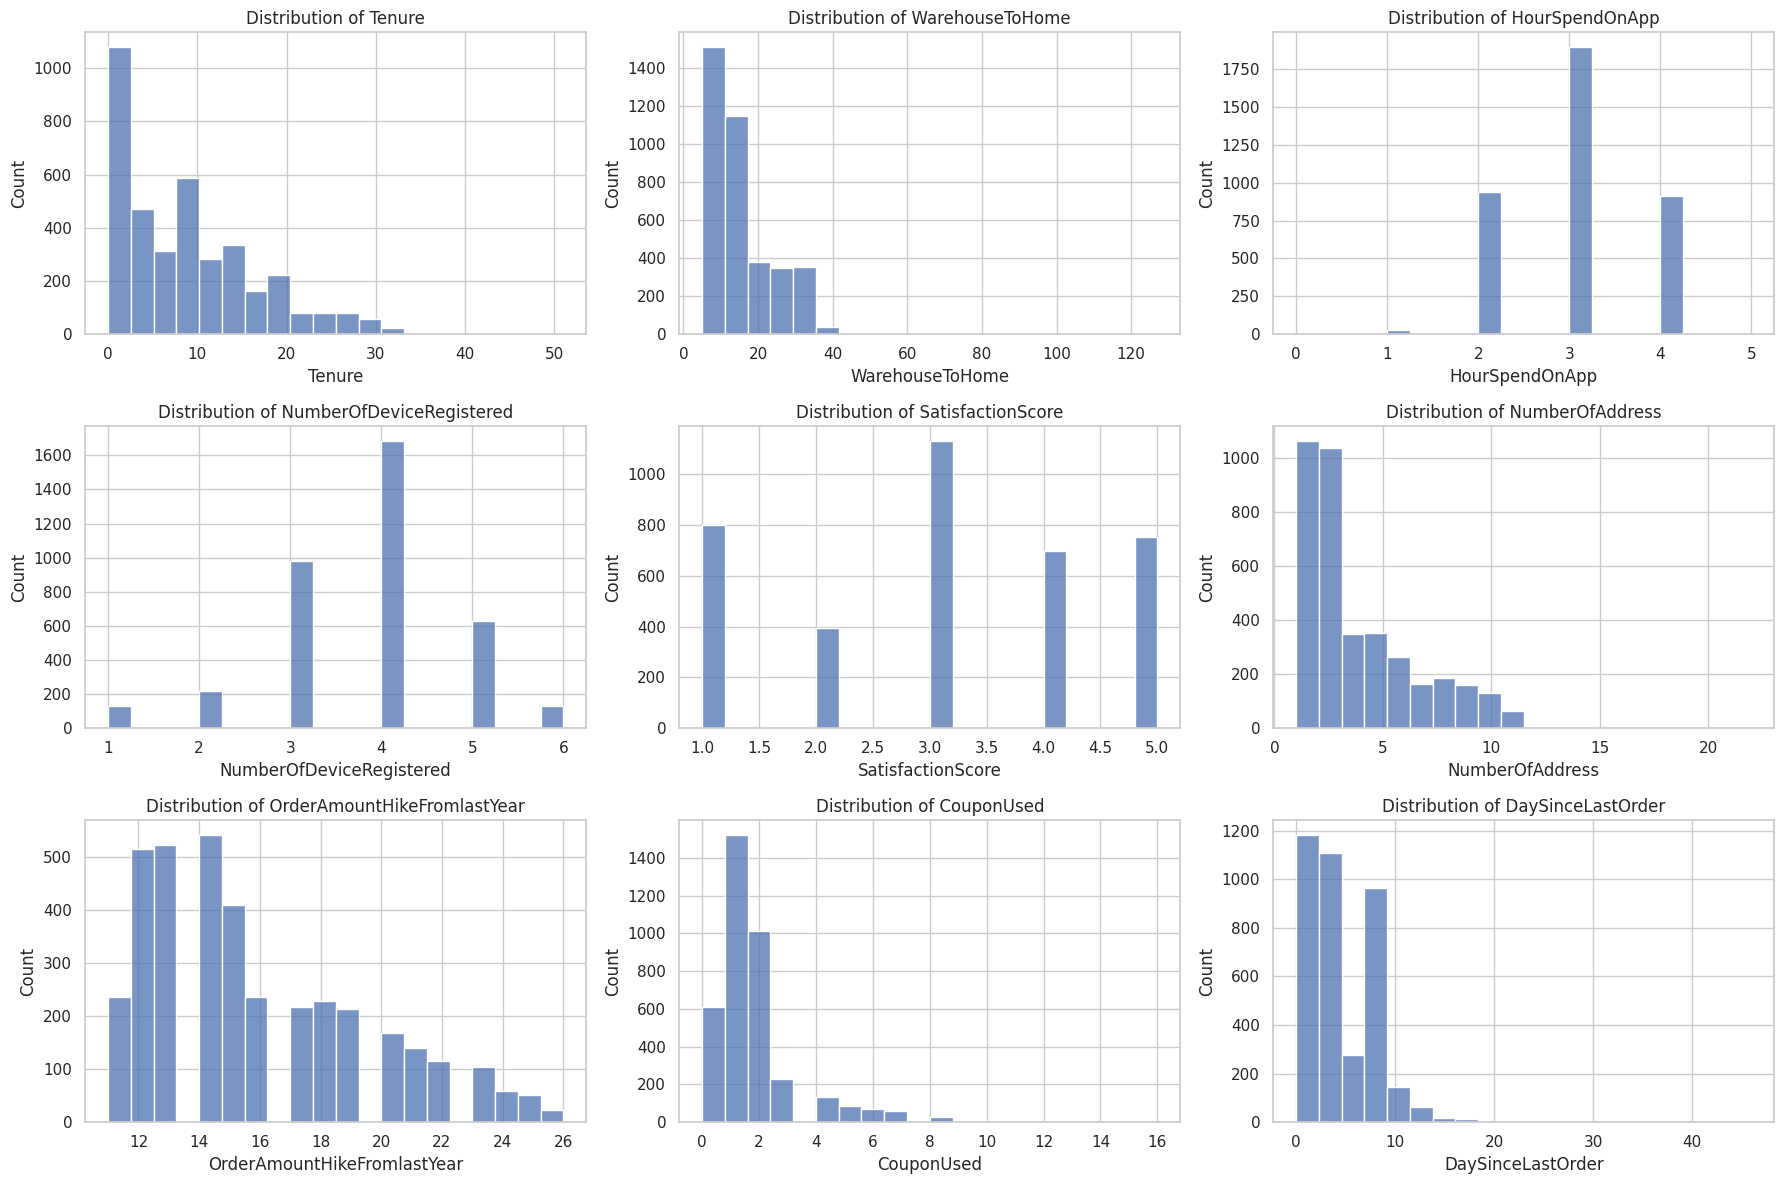

In [ ]:
# Configure Seaborn's style
sns.set(style="whitegrid")

# Create a figure with several subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))

# List of numeric columns for visualization
numeric_columns = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered',
                   'SatisfactionScore', 'NumberOfAddress', 'OrderAmountHikeFromlastYear',
                   'CouponUsed', 'DaySinceLastOrder']

# Loop to create the histograms
for idx, col in enumerate(numeric_columns):
    row, col_idx = divmod(idx, 3)
    sns.histplot(df[col], bins=20, kde=False, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'Distribution of {col}')

# Adjust the layout
plt.tight_layout()

# Show graphs
plt.show()


## Transforming categorical variables into dummy variables

In [ ]:
# Identify categorical columns in the DataFrame
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Create dummie variables for categorical columns
df_dummies = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Show the first rows of the new DataFrame with dummies variables
df_dummies.head()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,...,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
0,50001,1,4.0,3,6.0,3.0,3,2,9,1,...,False,False,False,False,True,False,False,False,False,True
3,50004,1,0.0,3,15.0,2.0,4,5,8,0,...,False,False,True,False,True,False,False,False,False,True
5,50006,1,0.0,1,22.0,3.0,5,5,2,1,...,False,False,False,False,False,False,True,False,False,True
11,50012,1,11.0,1,6.0,3.0,4,3,10,1,...,False,False,True,False,False,False,False,False,False,True
12,50013,1,0.0,1,11.0,2.0,3,3,2,1,...,False,False,True,False,False,True,False,False,False,True


## Recursive data elimination

In [ ]:
# Separate independent variables (X) from target variable (y)
X = df_dummies.drop("Churn", axis=1)
y = df_dummies["Churn"]

# Create the logistic regression model
model = LogisticRegression(max_iter=1000)

# Create the RFE model with the correct parameter to select 10 variables
rfe = RFE(estimator=model, n_features_to_select=10)
fit = rfe.fit(X, y)

# Show variable ranking
ranking = pd.DataFrame({'Feature': X.columns, 'Ranking': fit.ranking_}).sort_values(by='Ranking')
ranking


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Feature,Ranking
14,PreferredLoginDevice_Mobile Phone,1
26,PreferedOrderCat_Mobile Phone,1
24,PreferedOrderCat_Laptop & Accessory,1
20,PreferredPaymentMode_E wallet,1
16,PreferredPaymentMode_COD,1
28,MaritalStatus_Married,1
8,Complain,1
29,MaritalStatus_Single,1
2,CityTier,1
5,NumberOfDeviceRegistered,1


Variables with a ranking of 1 are those that the RFE model considers the most important. Here are the 10 most important variables according to this method:

PreferredLoginDevice_Mobile Phone
PreferredOrderCat_Mobile Phone
PreferedOrderCat_Laptop & Accessory
PreferredPaymentMode_E wallet
PreferredPaymentMode_COD
MaritalStatus_Married
Complain
MaritalStatus_Single
CityTier
NumberOfDeviceRegistered

## Normalization and recursive elimination of data

In [ ]:
# Normalize variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Rerun the RFE model with the normalized data
rfe_scaled = RFE(estimator=model, n_features_to_select=10)
fit_scaled = rfe_scaled.fit(X_scaled, y)

# Show variable ranking with normalized data
ranking_scaled = pd.DataFrame({'Feature': X.columns, 'Ranking': fit_scaled.ranking_}).sort_values(by='Ranking')
ranking_scaled

,Feature,Ranking
29,MaritalStatus_Single,1
1,Tenure,1
2,CityTier,1
24,PreferedOrderCat_Laptop & Accessory,1
5,NumberOfDeviceRegistered,1
6,SatisfactionScore,1
7,NumberOfAddress,1
8,Complain,1
12,DaySinceLastOrder,1
11,OrderCount,1


After normalizing the data and re-running the RFE model, here are the 10 most important variables according to this method:

MaritalStatus_Single
Tenure
CityTier
PreferedOrderCat_Laptop & Accessory
NumberOfDeviceRegistered
SatisfactionScore
NumberOfAddress
Complain
DaySinceLastOrder
OrderCount

# Setting up the model

## Data separation

In [ ]:
# Select only important variables for X
important_features = ranking_scaled[ranking_scaled['Ranking'] == 1]['Feature'].tolist()
X_important = df_dummies[important_features]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_important, y, test_size=0.2, random_state=42)

# Show dimensions of training and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3019, 10), (755, 10), (3019,), (755,))

## Entrainement du modèle

In [ ]:
# Create and train the logistic regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)

# Predict training set labels and calculate accuracy
train_predictions = logistic_model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)

train_accuracy


0.8896985756873137

The logistic regression model was trained with approximately 89% accuracy on the training set. This is a good starting point, but it is important to note that performance on the training set does not guarantee good performance on new data.


## Model evaluation

In [ ]:
# Predict test set labels
test_predictions = logistic_model.predict(X_test)

# Calculate accuracy on test set
test_accuracy = accuracy_score(y_test, test_predictions)

# Create the classification report
class_report = classification_report(y_test, test_predictions)

print("Test accuracy:", test_accuracy)
print(class_report)

Test accuracy: 0.9019867549668874
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       648
           1       0.71      0.52      0.60       107

    accuracy                           0.90       755
   macro avg       0.82      0.74      0.77       755
weighted avg       0.89      0.90      0.90       755



The accuracy of the model on the test set is around 90%, which is quite good and similar to the performance on the training set. This suggests that the model is not overfitting.

Here is the classification report:

Precision: The precision for class 0 (non-churn) is 0.92 and for class 1 (churn) is 0.71.

Recall: The recall for class 0 is 0.96 and for class 1 is 0.52.

F1-score: The F1-score, which is a harmonic average of precision and recall, is 0.94 for class 0 and 0.60 for class 1.

The report shows that the model is quite good at predicting class 0 (non-churn), but could be improved for class 1 (churn).

# Results interpretation

In [ ]:
# Get the coefficients of the logistic regression model
coefficients = logistic_model.coef_[0]

# Create a DataFrame to store the variables and their coefficients
coeff_df = pd.DataFrame({'Feature': important_features, 'Coefficient': coefficients})

# Sort the DataFrame by the absolute coefficients
coeff_df['abs_coefficient'] = coeff_df['Coefficient'].abs()
coeff_df = coeff_df.sort_values(by='abs_coefficient', ascending=False)

coeff_df


,Feature,Coefficient,abs_coefficient
7,Complain,1.574266,1.574266
3,PreferedOrderCat_Laptop & Accessory,-1.190099,1.190099
0,MaritalStatus_Single,0.890078,0.890078
2,CityTier,0.435605,0.435605
4,NumberOfDeviceRegistered,0.355862,0.355862
5,SatisfactionScore,0.271667,0.271667
1,Tenure,-0.228813,0.228813
6,NumberOfAddress,0.204998,0.204998
9,OrderCount,0.158776,0.158776
8,DaySinceLastOrder,-0.087837,0.087837


Here are the model coefficients for each variable:

Complaint: 1.57
PreferedOrderCat_Laptop & Accessory: -1.19
MaritalStatus_Single: 0.89
CityTier: 0.44
NumberOfDeviceRegistered: 0.36
SatisfactionScore: 0.27
Hold: -0.23
NumberOfAddress: 0.20
OrderCount: 0.16
DaySinceLastOrder: -0.09

The coefficients indicate the importance and direction of the effect of each variable on the probability of churn. For example, a positive coefficient for "Complain" means that complaining increases the probability of churn, while a negative coefficient for "PreferedOrderCat_Laptop & Accessory" means that preferring that category decreases the probability of churn.

# Model optimization

In [ ]:

# Define the hyperparameters to test
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'penalty': ['l1', 'l2', 'elasticnet'],
              'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

# Create a StratifiedKFold object for cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=logistic_model, param_grid=param_grid, cv=cv, scoring='accuracy')

# Run grid search on training set
grid_result = grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_result.best_params_
best_score = grid_result.best_score_
best_params, best_score

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
240 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Sol

({'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}, 0.8877055121742282)

It appears that some hyperparameter combinations are not valid, which is common when using GridSearchCV with complex models like logistic regression. Nevertheless, we achieved results.

The best hyperparameters found by GridSearchCV with StratifiedKFold are:


C=0.1

Penalty=l1

Solver=saga

With these hyperparameters, the best accuracy obtained on the validation sets is around 88.8%.

## Training and evaluation of the new model

In [ ]:
# Create and train the logistic regression model with the best hyperparameters
best_logistic_model = LogisticRegression(C=0.1, penalty='l1', solver='saga', max_iter=1000, random_state=42)
best_logistic_model.fit(X_train, y_train)

# Predict test set labels and calculate accuracy
best_test_predictions = best_logistic_model.predict(X_test)
best_test_accuracy = accuracy_score(y_test, best_test_predictions)

# Create the classification report for the optimized model
best_class_report = classification_report(y_test, best_test_predictions)

print(best_test_accuracy)
print(best_class_report)

0.904635761589404
              precision    recall  f1-score   support

           0       0.92      0.97      0.95       648
           1       0.75      0.49      0.59       107

    accuracy                           0.90       755
   macro avg       0.84      0.73      0.77       755
weighted avg       0.90      0.90      0.90       755



With the optimal hyperparameters, the model accuracy on the test set is around 90.5%, which is slightly better than the initial model.

Here is the classification report for the optimized model:

Precision: The precision for class 0 (non-churn) is 0.92 and for class 1 (churn) is 0.75.

Recall: The recall for class 0 is 0.97 and for class 1 is 0.49.

F1-score: The F1-score is 0.95 for class 0 and 0.59 for class 1.

The optimized model shows an improvement, especially regarding the accuracy for class 1 (churn). However, the recall for this class could still be improved.

# Ensemble learning : Boosting avec XGBoost

In [ ]:
# Create and configure the XGBoost template
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Train the model on the training set
xgb_model.fit(X_train, y_train)

# Predict test set labels and calculate accuracy
xgb_test_predictions = xgb_model.predict(X_test)
xgb_test_accuracy = accuracy_score(y_test, xgb_test_predictions)

# Create the classification report for the XGBoost model
xgb_class_report = classification_report(y_test, xgb_test_predictions)

print("Accuracy with XGBoost:", xgb_test_accuracy)
print(xgb_class_report)

Accuracy with XGBoost: 0.976158940397351
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       648
           1       0.96      0.87      0.91       107

    accuracy                           0.98       755
   macro avg       0.97      0.93      0.95       755
weighted avg       0.98      0.98      0.98       755



With almost 98% accuracy, the XGBoost model appears to perform very well on the test set. The classification report metrics, including precision, recall, and F1 score, are also very promising for both classes.

It seems that using XGBoost as an ensemble learning technique was very beneficial for the model. This is often the case because XGBoost is a powerful algorithm that can capture complex structures in data.